# Programming for Data Science and Artificial Intelligence

## 3 Numpy

### Readings: 
- [VANDER] Ch2
- https://numpy.org/doc/stable/

NumPy arrays are like Python's built-in list type, but NumPy arrays provide much more efficient storage and data operations as the arrays grow larger in size.

A python list comes with overhead of determining its dynamic type and convert them back to C.  Unlike python list, Numpy is constrained to arrays that all contain the same type, thus removing that overhead.

In [1]:
import numpy as np
np.__version__

'1.18.4'

## Creation

In [2]:
'''
numpy.array(object, dtype=None, copy=True, 
order='K', subok=False, ndmin=0)
'''

#create numpy array from list
l = [1, 2, 3, 4]
l_numpy = np.array(l)
print("1: List to numpy: ", l_numpy)

#if some is integer, some is float.  All will be upcasted to float
l = [1.3, 2, 3, 4]
l_numpy = np.array(l)
print("2: Typecasting: ", l_numpy)

#we can also expliclty define the type
l = [1, 2, 3, 4]
l_numpy_float = np.array(l, dtype='float32')
print("3: Dtype: ", l_numpy_float)

#astype, copy of the array, and cast to a specified type
#astype is a function of every numpy array, NOT np method
l_numpy_int32 = l_numpy_float.astype(int)
print("4: l_num_int32 using astype: ", l_numpy_int32)

#complex
print("5:",np.array([1, 2, 3], dtype=complex))

#NumPy arrays can explicitly be multi-dimensional
l = [[1, 2], [3, 4]]
l_numpy = np.array(l)
print("6: Multidimension: ", l_numpy)

#we can also leverage the list comprehension method
print("7: List comprehension: ", 
      np.array([range(i, i+3) for i in [2, 4, 6]]))

#for larger arrays, it is more efficient to create arrays 
#from scratch using routines built into NumPy. 
#Here are several examples:

print("9: Np zeors: ", np.zeros(10, dtype=int))
print("10: Np ones: ", np.ones((3,5), dtype=float))
print("11: Np full: ", np.full((4,2), 3.14))

#super handy
#here, we create 5 equal-distanced values from 0 to 1
print("12: Np linspace: ", np.linspace(0, 1, 5))

#we also have log space 10^1, 10^?
print("13: Np logspace: ", np.logspace(1, 2, 5))

#diag
print("14: Np diag: ", np.diag(np.arange(4)))

#also super handy is to random.  Researchers love randoming!
#Return random floats in the half-open interval [0.0, 1.0)
print("15: Randomize [0, 1)", np.random.random((3,3)))  #randomize a 3x3 array between 0 and 1

#random integers in the interval [0, 10)
print("16: Random integers [0, 10)", np.random.randint(0, 10, (3, 3)))

#normal distribution with m=0 and std=1
print("17: Normal dist. with m=0 and std=1", np.random.normal(0, 1, (3, 3)))

#identity matrix with size 3 x 3 for computing inverse of matrix
print("18:",np.eye(3))

#if you just want a scratch array, use empty
# values will be whatever already exists at that memory
print("19: Np empty: ", np.empty(3))

1: List to numpy:  [1 2 3 4]
2: Typecasting:  [1.3 2.  3.  4. ]
3: Dtype:  [1. 2. 3. 4.]
4: l_num_int32 using astype:  [1 2 3 4]
5: [1.+0.j 2.+0.j 3.+0.j]
6: Multidimension:  [[1 2]
 [3 4]]
7: List comprehension:  [[2 3 4]
 [4 5 6]
 [6 7 8]]
9: Np zeors:  [0 0 0 0 0 0 0 0 0 0]
10: Np ones:  [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
11: Np full:  [[3.14 3.14]
 [3.14 3.14]
 [3.14 3.14]
 [3.14 3.14]]
12: Np linspace:  [0.   0.25 0.5  0.75 1.  ]
13: Np logspace:  [ 10.          17.7827941   31.6227766   56.23413252 100.        ]
14: Np diag:  [[0 0 0 0]
 [0 1 0 0]
 [0 0 2 0]
 [0 0 0 3]]
15: Randomize [0, 1) [[0.84954698 0.51189939 0.67870394]
 [0.14266446 0.1822054  0.33319559]
 [0.04008282 0.62168497 0.97132741]]
16: Random integers [0, 10) [[2 6 9]
 [7 5 6]
 [9 0 4]]
17: Normal dist. with m=0 and std=1 [[ 0.43807507 -0.05027103 -1.33855433]
 [-0.39891113  1.03399164  0.64623759]
 [ 0.21551408  0.97460597 -0.72672977]]
18: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
19: Np empty:  [

## Attributes

First let's discuss some useful array attributes. We'll start by defining three random arrays, a one-dimensional, two-dimensional, and three-dimensional array. We'll use NumPy's random number generator, which we will seed with a set value in order to ensure that the same random arrays are generated each time this code is run:

Tips: Remember that attributes are not function, so DO NOT put () in front of all these attributes!!

In [3]:
import numpy as np
np.random.seed(1) #seed for reproducibility

x1 = np.random.randint(10, size = 6) #one dimensional array
print("1D: ", x1)
x2 = np.random.randint(10, size = (3, 4)) #two 
print("2D: ", x2)
x3 = np.random.randint(10, size = (3, 4, 5)) #three
print("3D: ", x3)

#observe the bracket in front to easily determine the dimension
#or simply use ndim
print(f"Dim: X1: {x1.ndim}, X2: {x2.ndim}, X3: {x3.ndim}")

#to observe the size of each dimension, use shape
#shape will be your most likely companion throughout your coding exp.
print(f"Shape: X1: {x1.shape}, X2: {x2.shape}, X3: {x3.shape}")
print(f"Len (but only first dim!): X1: {len(x1)}, X2: {len(x2)}, X3: {len(x3)}")

#to get number of elements, use ize
print(f"Size: X1: {x1.size}, X2: {x2.size}, X3: {x3.size}")

#each item size and nbytes
print(f"Item bytes: X1: {x1.itemsize}, X2: {x2.itemsize}, X3: {x3.itemsize}")
print(f"Total bytes: X1: {x1.nbytes}, X2: {x2.nbytes}, X3: {x3.nbytes}")

#another very useful one is dtype
print(f"Dtype: X1: {x1.dtype}, X2: {x2.dtype}, X3: {x3.dtype}")

1D:  [5 8 9 5 0 0]
2D:  [[1 7 6 9]
 [2 4 5 2]
 [4 2 4 7]]
3D:  [[[7 9 1 7 0]
  [6 9 9 7 6]
  [9 1 0 1 8]
  [8 3 9 8 7]]

 [[3 6 5 1 9]
  [3 4 8 1 4]
  [0 3 9 2 0]
  [4 9 2 7 7]]

 [[9 8 6 9 3]
  [7 7 4 5 9]
  [3 6 8 0 2]
  [7 7 9 7 3]]]
Dim: X1: 1, X2: 2, X3: 3
Shape: X1: (6,), X2: (3, 4), X3: (3, 4, 5)
Len (but only first dim!): X1: 6, X2: 3, X3: 3
Size: X1: 6, X2: 12, X3: 60
Item bytes: X1: 8, X2: 8, X3: 8
Total bytes: X1: 48, X2: 96, X3: 480
Dtype: X1: int64, X2: int64, X3: int64


## Indexing and Slicing

In [4]:
#basic indexing similar to list
print("X1: ", x1)
print("X1 first element: ", x1[0])
print("X1 first two elements: ", x1[:2])
print("X1 last element: ", x1[-1])
print("X1 last two element: ", x1[-2:])

#multidimension nparray can be accessed using a comma-separated tuple of indices
print("X2: ", x2)
print("X2 default access row-wise: ", x2[0])
print("X2 first row, third col: ", x2[0, 2])
print("X2 first row, last col: ", x2[0, -1])
print("X2 every row, last two col: ", x2[:, -2:])
print("X2 reversed: ", x2[::-1, ::-1])
print("X2 last two rows, every even col: ", x2[-2:, 1::2])

#3D or 4D will be your main research tool, so be of indices
print("X3: ", x3)
print("X3 default access row-wise: ", x3[0])
print("X3 first sheet, third row, last col: ", x3[0, 2, -1])
print("X3 second sheet, first two rows, last two cols: ", x3[1, :2, -2:])
print("X3 second sheet, everything, everything (essentially converting to 2D - very useful): ", x3[1, :, :])
print("X3 second sheet, without : : ", x3[1])

#of course, values can be modified, similar to list (but not tuples)
print("X2 first row, last col before: ", x2[0, -1])
x2[0, -1] = 99.013  #remember that x2 is a int type, so it will automatically truncate decimals
print("X2 first row, last col after: ", x2[0, -1])

X1:  [5 8 9 5 0 0]
X1 first element:  5
X1 first two elements:  [5 8]
X1 last element:  0
X1 last two element:  [0 0]
X2:  [[1 7 6 9]
 [2 4 5 2]
 [4 2 4 7]]
X2 default access row-wise:  [1 7 6 9]
X2 first row, third col:  6
X2 first row, last col:  9
X2 every row, last two col:  [[6 9]
 [5 2]
 [4 7]]
X2 reversed:  [[7 4 2 4]
 [2 5 4 2]
 [9 6 7 1]]
X2 last two rows, every even col:  [[4 2]
 [2 7]]
X3:  [[[7 9 1 7 0]
  [6 9 9 7 6]
  [9 1 0 1 8]
  [8 3 9 8 7]]

 [[3 6 5 1 9]
  [3 4 8 1 4]
  [0 3 9 2 0]
  [4 9 2 7 7]]

 [[9 8 6 9 3]
  [7 7 4 5 9]
  [3 6 8 0 2]
  [7 7 9 7 3]]]
X3 default access row-wise:  [[7 9 1 7 0]
 [6 9 9 7 6]
 [9 1 0 1 8]
 [8 3 9 8 7]]
X3 first sheet, third row, last col:  8
X3 second sheet, first two rows, last two cols:  [[1 9]
 [1 4]]
X3 second sheet, everything, everything (essentially converting to 2D - very useful):  [[3 6 5 1 9]
 [3 4 8 1 4]
 [0 3 9 2 0]
 [4 9 2 7 7]]
X3 second sheet, without : :  [[3 6 5 1 9]
 [3 4 8 1 4]
 [0 3 9 2 0]
 [4 9 2 7 7]]
X2 first row

### Very very important reminder - subarray are not copies!

In [5]:
some_array = np.random.randint(10, size = 6) #one dimensional array
print("some_array: ", some_array)

its_not_copy = some_array[1:3]
print("its_not_copy", its_not_copy)

its_not_copy[0] = 99

print("Some array got changed!!")
print("some_array: ", some_array)
print("its_not_copy", its_not_copy)

'''
This behavior is intended, since data scientists 
love to chop down dataset to subset when working
'''

#if we want copy, use copy()
another_array = np.random.randint(10, size = 6) #one dimensional array
print("another_array: ", another_array)

its_copy = another_array[1:3].copy()
print("its_copy", its_copy)

its_copy[0] = 99

print("Have peace :)")
print("another_array: ", another_array)
print("its_copy", its_copy)


some_array:  [0 8 7 7 1 1]
its_not_copy [8 7]
Some array got changed!!
some_array:  [ 0 99  7  7  1  1]
its_not_copy [99  7]
another_array:  [3 0 8 6 4 5]
its_copy [0 8]
Have peace :)
another_array:  [3 0 8 6 4 5]
its_copy [99  8]


## Reshaping

In [6]:
#reshape
#another one of the most useful function
grid = np.arange(1, 10)
print("1:", grid)

print("2: Make sure no. of elements match!: ", grid.size == 3 * 3)
print("3: New grid: ", grid.reshape((3,3)))  #reshape take a tuple as input

#common technique to reshape 1d to 2d
X = np.array([11, 22, 33, 44, 55])
print("4: X: ", X)
print("5: X shape: ", X.shape)  #you cannot input this to scikit learn since it expects (samples, features)
X = X.reshape((X.shape[0], 1))
print("6: 1D to 2D: ", X)
print("7: X reshape: ", X.shape)

#another way to reshape is to use np.newaxis
# 1D array
X = np.arange(4)
print("8: X: ", X.shape)

# make it as row vector by inserting an axis along second dimension
row_vec = X[np.newaxis, :]
print("9: Row vec: ", row_vec.shape)

# make it as column vector by inserting an axis along second dimension
col_vec = X[:, np.newaxis]
print("10: Col vec: ", col_vec.shape)

#common to reshape 2d to 3d for time algorithms, such as LSTM
X = np.array([[11, 22],
              [33, 44],
              [55, 66]])

print("11: X: ", X)
print("12: X shape: ", X.shape)  #you cannot input this to LSTM since it expects (samples, time steps, features)

#this X can be framed as 1 sample with 3 time steps and 2 features
X = X.reshape(1, X.shape[0], 2)
print("13: 2D to 3D: ", X)
print("14: X reshape : ", X.shape)

# -1 in reshape allow numpy to automatically 
# determine the correct shape; super useful
X = np.array([[[ 0, 1],
               [ 2, 3]],
              [[ 4, 5],
               [ 6, 7]],
              [[ 8, 9],
               [10, 11]],
              [[12, 13],
               [14, 15]]])

print("15: X: ", X)
print("16: X shape: ", X.shape)

X = X.reshape(-1, 2)
print("17: 3D to 2D using -1: ", X)
print("18: X reshape using -1: ", X.shape)

#reminder!  reshape is also a no-copy view
      
#other functions related to reshape
b = np.arange(16).reshape(4, 4)
print("19: b: ", b)
print("20: Ravel: ", b.ravel())  #returns a 1-D aray containing all elements

#transpose
b = np.array([[1,2],[3,4]]) 
print("21: Transpose: ", b.T)  #yes, that's it!
print("22: Inverse: ", np.linalg.inv(b)) # matrix inverse

1: [1 2 3 4 5 6 7 8 9]
2: Make sure no. of elements match!:  True
3: New grid:  [[1 2 3]
 [4 5 6]
 [7 8 9]]
4: X:  [11 22 33 44 55]
5: X shape:  (5,)
6: 1D to 2D:  [[11]
 [22]
 [33]
 [44]
 [55]]
7: X reshape:  (5, 1)
8: X:  (4,)
9: Row vec:  (1, 4)
10: Col vec:  (4, 1)
11: X:  [[11 22]
 [33 44]
 [55 66]]
12: X shape:  (3, 2)
13: 2D to 3D:  [[[11 22]
  [33 44]
  [55 66]]]
14: X reshape :  (1, 3, 2)
15: X:  [[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]]

 [[12 13]
  [14 15]]]
16: X shape:  (4, 2, 2)
17: 3D to 2D using -1:  [[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]]
18: X reshape using -1:  (8, 2)
19: b:  [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
20: Ravel:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
21: Transpose:  [[1 3]
 [2 4]]
22: Inverse:  [[-2.   1. ]
 [ 1.5 -0.5]]


## Concatenation, vstack/hstack

In [7]:
x = np.array([[1, 2, 3], 
              [3, 4, 1]])
y = np.array([[3, 2, 1]])

print("x: ", x.shape, "y: ", y.shape)

#all the input arrays must have same number of shape
#except in the dimension corresponding to the axis
print("Row concatenation: ", np.concatenate((x, y)))  #default axis = 0 (i.e., row)

#default axis = 1 (i.e., col).  Error because row has different dimension
#print("Column concatenation: ", np.concatenate((x, y), axis=1))  

X = np.array([[11, 22],
              [33, 44],
              [55, 66]])

Y = np.array([[11, 22],
              [33, 44],
              [55, 66]])

print("X: ", X.shape, "Y: ", Y.shape)

print("Row concat: ", np.concatenate([X, Y]))  #default axis = 0
print("Col concat: ", np.concatenate([X, Y], axis=1))  #default axis = 1


Z = np.array([[11, 22],
              [33, 44],
              [55, 66]])

print("Concat multiple list: ", np.concatenate((X, Y, Z)))

#Tips: Notice sometimes I use () or [] inside concatenate, 
#they both work since concatenate expect a tuple or lists of arrays

#instead of using axis =0 or 1, we can use hstack or vstack
#as name suggests, hstack stack horizontally (axis = 1) and
#vstack stack vertically (axis = 0)
print("Vstack (row-wise): ", np.vstack((X, Y, Z)))
print("Hstack (col-wise): ", np.hstack((X, Y, Z)))

x:  (2, 3) y:  (1, 3)
Row concatenation:  [[1 2 3]
 [3 4 1]
 [3 2 1]]
X:  (3, 2) Y:  (3, 2)
Row concat:  [[11 22]
 [33 44]
 [55 66]
 [11 22]
 [33 44]
 [55 66]]
Col concat:  [[11 22 11 22]
 [33 44 33 44]
 [55 66 55 66]]
Concat multiple list:  [[11 22]
 [33 44]
 [55 66]
 [11 22]
 [33 44]
 [55 66]
 [11 22]
 [33 44]
 [55 66]]
Vstack (row-wise):  [[11 22]
 [33 44]
 [55 66]
 [11 22]
 [33 44]
 [55 66]
 [11 22]
 [33 44]
 [55 66]]
Hstack (col-wise):  [[11 22 11 22 11 22]
 [33 44 33 44 33 44]
 [55 66 55 66 55 66]]


## Splitting

In [8]:
#I personally do not use splitting that much since slicing is
#much "raw" and granular
x = np.array([1, 2, 3, 99, 99, 3, 2, 1])
#numpy.split(ary, indices_or_sections, axis=0)

print("X: ", x)

#If indices_or_sections is an integer, N, 
#the array will be divided into N equal arrays along axis. 
#If such a split is not possible, an error is raised.
x1 = np.split(x, 4) #four equal-size array
#x1 = np.split(x, 3) #error
print("Equally split: ", x1) #ary[:3], ary[3:5], ary[5:]

#If indices_or_sections is a 1-D array of sorted integers, 
#the entries indicate where along axis the array is split.
x1, x2, x3 = np.split(x, (3, 5)) #can also accept [3, 5]
print("Split with :3, 3:5, 5:", x1, x2, x3) #ary[:3], ary[3:5], ary[5:]

some_grid = np.arange(16).reshape((4,4))

print("some_grid: ", some_grid)

#equal split using an integer
print("Multi-dimensional split using 2: ", np.split(some_grid, 2))

#split based on indices
print("Multi-dimensional split with :1, 1:", np.split(some_grid, [1]))
print("Multi-dimensional split with :1, 1:2, 2: ", np.split(some_grid, [1, 2]))
print("Multi-dimensional split with :1, 1:3, 3: ", np.split(some_grid, [1, 3]))
print("Multi-dimensional split with :1, 1:2, 2:3, 3: ", np.split(some_grid, [1, 2, 3]))

#change axis = 1
print("Multi-dimensional split with :1, 1: with axis = 1", np.split(some_grid, [1], axis=1))

#use hsplit
left, right = np.hsplit(some_grid, [2]) #similar to axis = 1
print("Left: ", left)
print("Right: ", right)

#use vsplit
upper, lower = np.vsplit(some_grid, [2]) #similar to axis = 0
print("Upper: ", upper)
print("Lower: ", lower)

X:  [ 1  2  3 99 99  3  2  1]
Equally split:  [array([1, 2]), array([ 3, 99]), array([99,  3]), array([2, 1])]
Split with :3, 3:5, 5: [1 2 3] [99 99] [3 2 1]
some_grid:  [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
Multi-dimensional split using 2:  [array([[0, 1, 2, 3],
       [4, 5, 6, 7]]), array([[ 8,  9, 10, 11],
       [12, 13, 14, 15]])]
Multi-dimensional split with :1, 1: [array([[0, 1, 2, 3]]), array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])]
Multi-dimensional split with :1, 1:2, 2:  [array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11],
       [12, 13, 14, 15]])]
Multi-dimensional split with :1, 1:3, 3:  [array([[0, 1, 2, 3]]), array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]]), array([[12, 13, 14, 15]])]
Multi-dimensional split with :1, 1:2, 2:3, 3:  [array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]]), array([[12, 13, 14, 15]])]
Multi-dimensional split with :1, 1: with axis = 1[array([[ 0],
    

## Vectorization and Broadcasting

In [9]:
import timeit
#list way - less efficient
a = [1, 2, 3, 4, 5]
b = [1, 1, -1, 5, 1]
print("Not sum", a + b) #this will result in concatenation!

#we can sum using list comprehension with zip
print("Zip + List comprehension: ",[x + y for x, y in zip(a, b)])
#%timeit [x + y for x, y in zip(a, b)]

#more efficient way is to use vectorization
a_numpy = np.array([1, 2, 3, 4, 5])
b_numpy = np.array([1, 1, 1, 5, 1])
print("a + b", a_numpy + b_numpy)  #useful for working with big collections of data
#%timeit a_numpy + b_numpy

#np array also can be vectorized by a scalar value
print("1 - a_numpy", 1 - a_numpy)
print("a_numpy ** 2", a_numpy ** 2)
print("-a_numpy", (-a_numpy + 5) / 10)  #imagine apply f(x) across all values!

#Tips: when writing loops in python, also think whether you can vectorized!

#you can also use other wrappers like
#np.add, np.subtract, np.negatve, np.multiply, np.divide
#np.floor_divide, np.power, np.mod, np.mean, np.var
#np.sin, np.cos, np.tan, np.arcsin, np.arccos, np.arctan
#np.exp - base e, np.exp2, np.power
#np.log - ln x, np.log2, np.log10

print("np.add(a, b): ", np.add(a, b))
print("np.mod(a, 3): ", np.mod(a, 3))
#imagine this [i for i in a if a % 3 == 0]
print("np.min: ", np.min(a)) #return value
print("np.argmin: ", np.argmin(a)) #returns index

#very common use
print("np.dot(a, b): ", np.dot(a, b))

#useful one is np.abs
print("np.abs(b): ", np.abs(b))

#aggregates
x = np.arange(1, 6)
print("Sum of all elements: ", np.add.reduce(x))
print("Products of all elements: ", np.multiply.reduce(x))
print("Accumulate sum of all elements: ", np.add.accumulate(x))
print("Accumulate product of all elements: ", np.multiply.accumulate(x))
print("Outer products: ", np.multiply.outer(x, x))

Not sum[1, 2, 3, 4, 5, 1, 1, -1, 5, 1]
Zip + List comprehension:  [2, 3, 2, 9, 6]
a + b [2 3 4 9 6]
1 - a_numpy [ 0 -1 -2 -3 -4]
a_numpy ** 2 [ 1  4  9 16 25]
-a_numpy [0.4 0.3 0.2 0.1 0. ]
np.add(a, b):  [2 3 2 9 6]
np.mod(a, 3):  [1 2 0 1 2]
np.min:  1
np.argmin:  0
np.dot(a, b):  25
np.abs(b):  [1 1 1 5 1]
Sum of all elements:  15
Products of all elements:  120
Accumulate sum of all elements:  [ 1  3  6 10 15]
Accumulate product of all elements:  [  1   2   6  24 120]
Outer products:  [[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]


## Broadcasting

Broadcasting is actually a built-in vectorization technique when shape is different

Here are the broadcasting rules:

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape
- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

A simple way to think about broadcasting is as follows:

<code>a = 5
b = np.array([1, 1, 1])  #shape with (3, )
a + b = [6, 6, 6]</code>

Actually, what broadcasting does is to stretch a to [5, 5, 5] to match the dimension of b.  As you can see, the shape of [5, 5, 5] has shape with (3, ) as well.  BTW, this duplication does not actually take place, but it is a useful mental model to think about broadcasting

In [10]:
#let's take one example
print("====== Example 1 ======")
a = np.ones((2, 3))
print("A: ", a, " shape: ", a.shape)
b = np.arange(3)
print("B: ", b, " shape: ", b.shape)

'''
what is a + b?
First, rule 1 applies since a and b has different dimension
the smaller one is padded with 1 from left
resulting in B having shape of (1, 3) and A still has shape of (2, 3)

Now, since dimension one does not match, 1 and 2, thus the 1 will be 
stretched to become 2
resulting in B having shape of (2, 3) and A still has shape of (2, 3)

And thus the result is of shape (2, 3)
'''

print("A + B: ", a + b)
print("A + B shape: ", (a+b).shape)

#another example
print("====== Example 2 ======")
a = np.arange(3).reshape((3,1))
b = np.arange(3)
print("A: ", a, " shape: ", a.shape)
print("B: ", b, " shape: ", b.shape)

'''
B has fewer dimension, Rule 1 applies thus shape from (3, ) becomes (1, 3)
Now A has shape of (3, 1) and B has shape of (1, 3)
Rule 2 applies, stretching any one of match the other, thus
A has shape of (3, 3) and B has shape of (3, 3)
'''

print("A + B: ", a + b)
print("A + B shape: ", (a+b).shape)

#another example
print("====== Example 3 ======")
a = np.ones((3, 2))
b = np.arange(3)
print("A: ", a, " shape: ", a.shape)
print("B: ", b, " shape: ", b.shape)

'''
By Rule 1, B has fewer dimension, thus becomes (1, 3) while A still has (3, 2)
By Rule 2, then B becomes (3, 3) while A is still (3, 2)
Since no more rule can be applied, this results in an error
'''
#error
#print("A + B: ", a + b)
#print("A + B shape: ", (a+b).shape)

#this is where reshaping comes to the rescue
#perhaps we can reshape B to (3, 1)
b = b.reshape(b.shape[0], 1)
print("B new: ", b)
print("B newshape: ", b.shape)
print("A + B: ", a + b)
print("A + B shape: ", (a+b).shape)

#another example - broadcast + reshape
print("====== Example 4 ======")
a = np.array([1, 2, 3, 4, 5])
b = np.array([5, 4, 3])
print("A: ", a, " shape: ", a.shape)
print("B: ", b, " shape: ", b.shape)

'''
Rule 1 cannot be applied since they have same dimension
Rule 2 cannot be applied as well since there are no ones
'''
#errors
# a + b
#in this case, we can add 1 to a or b
a = a[:, np.newaxis] 
print("A: ", a, " shape: ", a.shape)
print("B: ", b, " shape: ", b.shape)
print("A + B: ", a + b)

#applying newaxis to a becomes (5, 3), if b becomes (3, 5)
print("A + B shape: ", (a+b).shape)

====== Example 1 ======
A:  [[1. 1. 1.]
 [1. 1. 1.]]  shape:  (2, 3)
B:  [0 1 2]  shape:  (3,)
A + B:  [[1. 2. 3.]
 [1. 2. 3.]]
A + B shape:  (2, 3)
====== Example 2 ======
A:  [[0]
 [1]
 [2]]  shape:  (3, 1)
B:  [0 1 2]  shape:  (3,)
A + B:  [[0 1 2]
 [1 2 3]
 [2 3 4]]
A + B shape:  (3, 3)
====== Example 3 ======
A:  [[1. 1.]
 [1. 1.]
 [1. 1.]]  shape:  (3, 2)
B:  [0 1 2]  shape:  (3,)
B new:  [[0]
 [1]
 [2]]
B newshape:  (3, 1)
A + B:  [[1. 1.]
 [2. 2.]
 [3. 3.]]
A + B shape:  (3, 2)
====== Example 4 ======
A:  [1 2 3 4 5]  shape:  (5,)
B:  [5 4 3]  shape:  (3,)
A:  [[1]
 [2]
 [3]
 [4]
 [5]]  shape:  (5, 1)
B:  [5 4 3]  shape:  (3,)
A + B:  [[ 6  5  4]
 [ 7  6  5]
 [ 8  7  6]
 [ 9  8  7]
 [10  9  8]]
A + B shape:  (5, 3)


## Masking

Instead of writing if/while, we can use Boolean masks to elegantly extract desired values from numpy arrays.  You will love it!!

In [11]:
rng = np.random.RandomState(0)  #for reproducibility
x = rng.randint(10, size=(3, 4))
print(x)

#a mask is simply a vector of truth values
print("x<4: ", x<4)

#extract all values less than 4
print("All values less than 4: ", x[x<4])
print("All values divisible by 3: ", x[x%3==0])
print("All values that are nan: ", x[np.isnan(x)])

#show the position
print("Argwhere: ", np.argwhere(x<4))

#count how many values in x less than 4
print(np.sum(x<4))  #since True=1 and False=0, sum can be used
print(np.count_nonzero(x<4))  #another way

#count IF ANY value is == 0
print("Any value ==0? ", np.any(x==0))
print("Any value ==0 along axis 1?", np.any(x==0, axis=1))
print("Any value ==0 along axis 0?", np.any(x==0, axis=0))

#count IF ALL value is > 0
print(np.all(x>0))

#definitely multiple conditions can be done
print(np.any((x==0) & (x==2))) 

#and vs. &
print("bin 42: ", bin(42))
print("bin 59: ", bin(59))
print("bin 42 & 59: ", bin(42 & 59)) #& is a bitwise comparison
print("bin 42 and 59: ", bin(42 and 59))#and is a logical operator

#and is short-circuiting but not &
True or print('hello')  #second expression will not be evaluated
False and print('hello') #similar

#True | print('hello') #raise error, since print('hello') returns None
#False & print('hello') #raise error, since print('hello') returns None

#& only make sense for integers or True/False comparison
print("True and 'True': ", True and "True")
# print("True & 'True': ", True & "True") #raise error

##Bottom line, since only True, False, and integers can be treated bitwise
##it only make sense to use & | for integers or True False
##In addition,  if you are dealing with vectors of truth values, or 
##math manipulation of integers, or arrays then use & |, or sometimes with numpy
##similar to print(np.any((x==0) & (x==2))) since they return a
##vector of truth values --> array([False, False, True...])

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]
x<4:  [[False  True  True  True]
 [False False  True False]
 [ True False False False]]
All values less than 4:  [0 3 3 3 2]
All values divisible by 3:  [0 3 3 9 3 6]
All values that are nan:  []
Argwhere:  [[0 1]
 [0 2]
 [0 3]
 [1 2]
 [2 0]]
5
5
Any value ==0?  True
Any value ==0 along axis 1? [ True False False]
Any value ==0 along axis 0? [False  True False False]
False
False
bin 42:  0b101010
bin 59:  0b111011
bin 42 & 59:  0b101010
bin 42 and 59:  0b111011
True and 'True':  True


## Fancy indexing

Instead of pass individual indices, we can pass array of indices all at once, and it will return a list of numbers

In [12]:
import random
a = np.random.randint(100, size = 10)
print(a)

[70  2 76 91 21 75  7 77 72 75]


In [13]:
print("1: Normal indices: ", a[0], a[3], a[5])
print("2: Fancy indices: ", a[[0, 3, 5]])  #remember that the argument is a list

#error!
#print("Common mistake: ", a[0, 3, 5])

'''
When using fancy indexing, the shape of the 
result reflects the shape of the index arrays 
rather than the shape of the array being indexed:
'''
ix = np.array([[3, 7],
               [4, 5]])
print("3: Shape follow ix shape: ", a[ix])

#also works in multiple dimensions
X = np.arange(12).reshape((3,4))
print("4: X 2D: ", X)
row_ix = np.array([0, 1, 2])
col_ix = np.array([2, 1, 3])
print("5: X[row_ix, col_ix]: ", X[row_ix, col_ix]) #[0, 2], [1, 1], [2, 3]

#combined indexing with indexing/slicing
print("6: X[2,  [2, 0, 1]]: ", X[2, [2, 0, 1]])
print("7: X[1:, [2, 0, 1]]: ", X[1:, [2, 0, 1]])

#combined indexing with masking
print("8: Slicing + fancy + masking: ", X[1:, [2, 0, 1]][X[1:, [2, 0, 1]]%2==0])

#if you do not like above, here probably more readable
Y = X[1:, [2, 0, 1]]
print("9: More readable way: ", Y[Y%2==0])

#3d
X = np.arange(36).reshape((3, 4, 3))
print("10: X 3D: ", X)
print("11: X 3D  X[1, [1, 0, 1], [2, 1, 1]]: ", X[1, [1, 0, 1], [2, 1, 1]])
print("12: X 3D  X[1:, [1, 0, 1], [2, 1, 1]]: ", X[1:, [1, 0, 1], [2, 1, 1]])
print("13: X 3D  X[1:, [1, 0, 1]]: ", X[1:, [1, 0, 1]])
print("14: X 3D  X[[1,0,1], [1, 0, 1],[1,0,1]]: ", X[[1,0,1], [1, 0, 1],[1,0,1]])
print("15: X 3D  X[[1,0,1], [1, 0, 1],[1,0,1]]: ", X[[1,0,1], [1, 0, 1],[1,0,1]])

#modifying values using fancy indexing
x = np.arange(10)
ix = np.array([2, 1, 8, 4])
x[ix] = 99
print("16: All ix values got change: ", x)

#do not repeat indices!
x[[0, 0]] = 4, 6
print("17: Where did the 4 go?: ", x) #x[0] =4 got overriden by x[0] = 6

#fancy indexing does not work well with repeation
x = np.zeros(10)
ix = [2, 3, 3, 4, 4, 4]
x[ix] += 1
print("18: Why position 3 and 4 remains 1?: ", x)
#this is because x[i] += i is shorthand for x[i]=x[i]+1, thus
#it is simply x[4] = 0 assigning for 3 times

#similar operations can be done using np.add.at
x = np.zeros(10)
np.add.at(x, ix, 1)
print("19: X: ", x)

1: Normal indices:  70 91 75
2: Fancy indices:  [70 91 75]
3: Shape follow ix shape:  [[91 77]
 [21 75]]
4: X 2D:  [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
5: X[row_ix, col_ix]:  [ 2  5 11]
6: X[2,  [2, 0, 1]]:  [10  8  9]
7: X[1:, [2, 0, 1]]:  [[ 6  4  5]
 [10  8  9]]
8: Slicing + fancy + masking:  [ 6  4 10  8]
9: More readable way:  [ 6  4 10  8]
10: X 3D:  [[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]
  [18 19 20]
  [21 22 23]]

 [[24 25 26]
  [27 28 29]
  [30 31 32]
  [33 34 35]]]
11: X 3D  X[1, [1, 0, 1], [2, 1, 1]]:  [17 13 16]
12: X 3D  X[1:, [1, 0, 1], [2, 1, 1]]:  [[17 13 16]
 [29 25 28]]
13: X 3D  X[1:, [1, 0, 1]]:  [[[15 16 17]
  [12 13 14]
  [15 16 17]]

 [[27 28 29]
  [24 25 26]
  [27 28 29]]]
14: X 3D  X[[1,0,1], [1, 0, 1],[1,0,1]]:  [16  0 16]
15: X 3D  X[[1,0,1], [1, 0, 1],[1,0,1]]:  [16  0 16]
16: All ix values got change:  [ 0 99 99  3 99  5  6  7 99  9]
17: Where did the 4 go?:  [ 6 99 99  3 99  5  6  7 99  9]
18: Why position 

## Other very useful stuffs about numpy

In [14]:
#sorting
'''
Although Python has built-in sort and sorted functions to work 
with lists, we won't discuss them here because NumPy's np.sort 
function turns out to be much more efficient and useful for our
purposes. By default np.sort uses an [NlogN]O[Nlog⁡N], quicksort 
algorithm, though mergesort and heapsort are also available. 
For most applications, the default quicksort is more than sufficient.
'''

some_list = list(range(100))
random.shuffle(some_list)
some_numpy = np.arange(100)
np.random.shuffle(some_numpy)

#in microseconds
#%timeit some_list.sort()

#in nanoseconds
#%timeit some_numpy.sort() #can also use np.sort(some_numpy)

#return the indices of the sorted elements
some_numpy.argsort()

array([16, 11, 76, 20,  9, 67, 42, 94, 27, 38, 88, 14, 80, 89, 45, 68, 23,
       66, 17, 47, 97, 50, 61, 87, 84, 51, 18, 32, 25,  8, 96, 30, 81, 56,
       15, 12, 95, 60,  4, 49, 29, 33, 65, 98, 41, 93, 21, 10, 70, 58, 57,
       46, 48, 55, 74, 22, 28, 91,  7, 44, 78,  2,  3, 43, 54, 79, 72, 35,
       92, 63, 73, 71, 31, 62, 83, 53, 99, 39, 19,  6,  0, 86, 90, 69, 77,
       36, 52, 24, 75, 59, 64, 34, 40, 26, 85,  5,  1, 82, 13, 37])

In [15]:
#numpy.digitize
#in machine learning, it is useful to discretize the position

# Input array
x = np.array([0.5])

# Bins - 5 bins in total
#bin1 < 0
#bin2 0 <= x < 1
#bin3 1 <= x < 2
#bin4 2 <= x < 3
#bin5 4 <= x
bins = np.array([0,1,2,3])

# Digitize function - 0.5 belong to the bin 0<= 0.5 <1 - therefore returned index 1
print("0.5 falls to bin: ", np.digitize(x,bins))
# array([1], dtype=int64)

# The input array can contain several inputs
x = np.array([-0.5,1,3.5])

# Digitize function
print("-0.5, 1, 3.5 falls to: ", np.digitize(x,bins))
# array([0, 2, 4], dtype=int64)

0.5 falls to bin:  [1]
-0.5, 1, 3.5 falls to:  [0 2 4]


In [16]:
#numpy repeat
#this is quite trivial, but I found it quite useful
#compare to np.zeros
print("Repeat 3 5 times: ", np.repeat(3, 5))
print("Repeat '2015' 5 times: ", np.repeat("2015", 5))

Repeat 3 5 times:  [3 3 3 3 3]
Repeat '2015' 5 times:  ['2015' '2015' '2015' '2015' '2015']


In [17]:
#numpy.random.binomial
#we can simulate a wide variety of statistical distributions 
#by using numpy such as normal, beta, binomial, uniform, gamma, or 
#poisson distributions.

#for example, let's simulate a coin flip 10 times with p=0.5
#since coin flip is a binomial distribution
n, p, trials = 1, .5, 100  #how many choice, 0 and 1, probability of each trial, output shape
flips = np.random.binomial(1, 0.5, trials)
print("Binomial: ", flips)
print("Probability of getting 1: ", np.sum(flips == 0)/trials)
print("Probability of getting 1: ", np.sum(flips == 1)/trials)

Binomial:  [0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0
 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1]
Probability of getting 1:  0.47
Probability of getting 1:  0.53


In [18]:
##numpy polyfit
#let's say I have four set of data
eeg = np.array([[2, 4, 3], [3, 4, 5], [1, 2, 7], [3, 8, 6], [2,5,1], [5,8,4]])
eeg_ts = np.array([12089, 12130, 12239, 12345, 12367, 12470])
marker = np.array([1, 2, 2])  #1 for cat, #2 for dog
marker_ts = np.array([12072, 12321, 12389])

mapped_markers = np.zeros(len(eeg_ts)) #
print("Mapped markers: ", mapped_markers)

#how do I map the markers to the correct eeg?
#first easy way is to find the smallest difference
#we can use argmin to find the position like this
for each_marker_index, each_marker_time in enumerate(marker_ts):
    ix = np.argmin(np.abs(each_marker_time - eeg_ts))
    print("Index with smallest difference: ", ix)
    mapped_markers[ix] = marker[each_marker_index]

print("Mapped markers: ", mapped_markers)

#a more elegant way is to use polyfit, which applies 
#linear regression to find the best fit
y_axis = list(range(len(eeg_ts)))  #simply index
coeff = np.polyfit(eeg_ts, y_axis, 1)  #deg = 1 means linear
slope, intercept = coeff
print("Slope, intercept: ", slope, intercept)
#or y = 0.0126x - 151.753 where y is indices, and x is eeg_ts

#using similar model, we can use to predict the indices, given marker_ts
#we use polyval
marker_ind = np.rint(np.polyval(coeff, marker_ts)).astype(int)
print(marker_ind)

#use fancy indexing to create mapped_markers
mapped_markers = np.zeros(len(eeg_ts))  #clear above results
mapped_markers[marker_ind] = marker
print("Mapped_markers using polyfit and val: ", mapped_markers)

Mapped markers:  [0. 0. 0. 0. 0. 0.]
Index with smallest difference:  0
Index with smallest difference:  3
Index with smallest difference:  4
Mapped markers:  [1. 0. 0. 2. 2. 0.]
Slope, intercept:  0.012568181538347916 -151.75348141399013
[0 3 4]
Mapped_markers using polyfit and val:  [1. 0. 0. 2. 2. 0.]


A shape:  (1, 2, 1)
A:  [[[1]
  [1]]]
New a shape:  (2, 1)
New a:  [[1]
 [1]]
Bare bone shape:  (2,)
Bare bone a:  [1 1]


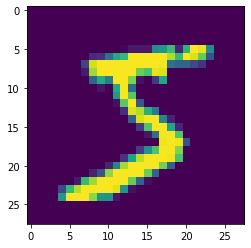

In [19]:
#numpy.squeeze
#sometimes it is useful to removes single-dimensional entries
#from the shape of an array.  The argument axis
#specifies the axis we want to squeeze out.  If the shape 
#of the selected axis is greater than 1, ValueError will be raised

a = np.array([[[1], [1]]])
print("A shape: ", a.shape)
print("A: ", a)
new_a = np.squeeze(a, axis=0)
print("New a shape: ", new_a.shape)
print("New a: ", new_a)

#however, you cannot squeeze out axis 1 since the number is 2
#new_a2 = np.squeeze(a, axis=1)

#you can squeeze all 1 dimension away by simply performing squeeze
bare_bone_a = np.squeeze(a)
print("Bare bone shape: ", bare_bone_a.shape)
print("Bare bone a: ", bare_bone_a)

#A useful case study
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# load the mnist datasets
data = datasets.MNIST(root='data',download=True, transform=transform)

# create an iterable over the dataset
loader = torch.utils.data.DataLoader(data, batch_size=20)

# iterate over the iterator one element at a time
dataiter = iter(loader)
images, labels = dataiter.next()

# batch size 20 - number of channels 1
# height of input planes in pixels 28 , and W width in pixels 28 .
images.shape
#torch.Size([20, 1, 28, 28])

# select first element of the batch
images[0].shape
#torch.Size([1, 28, 28])

#plt.imshow(images[0])
#TypeError: Invalid dimensions for image data

# eliminate the first axis 
np.squeeze(images[0]).shape
#torch.Size([28, 28])

plt.imshow(np.squeeze(images[0]))

In [2]:
import numpy as np
X = np.arange(36).reshape((3, 4, 3))
X

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]],

       [[24, 25, 26],
        [27, 28, 29],
        [30, 31, 32],
        [33, 34, 35]]])

In [3]:
X[1, [1, 0, 1], [2, 1, 1]]

array([17, 13, 16])

In [15]:
X[1, [1, 0, 1], [2]]

array([17, 14, 17])

In [18]:
X[1:]

array([[[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]],

       [[24, 25, 26],
        [27, 28, 29],
        [30, 31, 32],
        [33, 34, 35]]])

In [19]:
X[1:, [1, 0, 1]]

array([[[15, 16, 17],
        [12, 13, 14],
        [15, 16, 17]],

       [[27, 28, 29],
        [24, 25, 26],
        [27, 28, 29]]])

In [20]:
X[1:, [1, 0, 1], [2, 1, 1]]

array([[17, 13, 16],
       [29, 25, 28]])

In [23]:
X[[1, 0, 1], [1, 0, 1], [1, 0, 1]]

array([16,  0, 16])

In [26]:
x = np.arange(10)
print(x)

[0 1 2 3 4 5 6 7 8 9]


In [27]:
x[[0, 0]] = 4, 6

print(x)

[6 1 2 3 4 5 6 7 8 9]


In [28]:
x = np.zeros(10)

ix = [2, 3, 3, 4, 4, 4]
x[ix] += 1

x

array([0., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [29]:
np.zeros(10)
np.add.at(x, ix, 1)
print(x)

[0. 0. 2. 3. 4. 0. 0. 0. 0. 0.]


In [31]:
x = np.array([0.5])

bins = np.array([0, 1, 2, 3])

np.digitize(x, bins)

array([1])

In [33]:
eeg = np.array([[2, 4, 3], [3, 4, 5], [1, 2, 7], [3, 8, 6], [2,5,1], [5,8,4]])
eeg_ts = np.array([12089, 12130, 12239, 12345, 12367, 12470])
marker = np.array([1, 2, 2])  #1 for cat, #2 for dog
marker_ts = np.array([12072, 12321, 12389])

mapped_markers = np.zeros(len(eeg_ts)) #
print("Mapped markers: ", mapped_markers)

#how do I map the markers to the correct eeg?
#first easy way is to find the smallest difference
#we can use argmin to find the position like this
for each_marker_index, each_marker_time in enumerate(marker_ts):
    ix = np.argmin(np.abs(each_marker_time - eeg_ts))
    print("Index with smallest difference: ", ix)
    mapped_markers[ix] = marker[each_marker_index]

print("Mapped markers: ", mapped_markers)




Mapped markers:  [0. 0. 0. 0. 0. 0.]
Index with smallest difference:  0
Index with smallest difference:  3
Index with smallest difference:  4
Mapped markers:  [1. 0. 0. 2. 2. 0.]


In [34]:
y_axis = list(range(len(eeg_ts)))
y_axis

[0, 1, 2, 3, 4, 5]

In [35]:
coeff = np.polyfit(eeg_ts, y_axis, 1)

In [36]:
slope, intercept = coeff

In [41]:
a = np.polyval(coeff, marker_ts)
print(a)

[-0.03039388  3.09908332  3.95371966]


In [42]:
np.rint(a)

array([-0.,  3.,  4.])

In [43]:
a = np.random.rand(1, 28, 28)

In [44]:
np.squeeze(a).shape

(28, 28)

In [48]:
a_reshape = a.reshape(a.shape[1], a.shape[2])
a_reshape.shape

(28, 28)